In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
missing_values = df.isna().sum()
missing_values

df = df.dropna()

In [4]:
#check
missing_values = df.isna().sum()
missing_values

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#going back to remove outliers 
df = df[df["flipper_length_mm"] > 0]
df = df[df["culmen_length_mm"] > 0]
df = df[df["culmen_depth_mm"] > 0]
df = df[df["body_mass_g"] > 0]
df = df[df["flipper_length_mm"] < 400] 

In [6]:
features = df[["culmen_length_mm", "culmen_depth_mm","flipper_length_mm", "body_mass_g"]]
scaler = StandardScaler()
X = scaler.fit_transform(features)

/Users/aaratibrahme/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaratibrahme/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaratibrahme/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaratibrahme/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

Text(0.5, 1.0, 'Using Elbow Method to Select k')

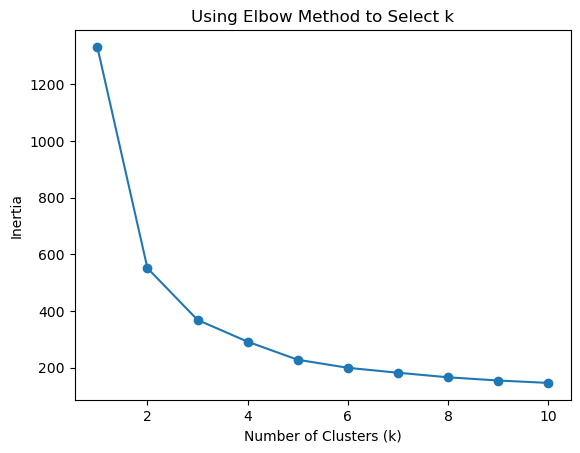

In [16]:
#need to make elbow plot
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker = "o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Using Elbow Method to Select k")


In [ ]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df["cluster"] = clusters

/Users/aaratibrahme/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#pca 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df["PC1"] = pca_components[:, 0]
df["PC2"] = pca_components[:, 1]

df.sort_values("PC2", ascending=False).head()



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster,PC1,PC2
183,54.2,20.8,201.0,4300.0,MALE,0,0.164341,2.621913
189,52.0,20.7,210.0,4800.0,MALE,0,0.713838,2.382353
215,55.8,19.8,207.0,4000.0,MALE,0,0.543195,2.370448
191,53.5,19.9,205.0,4500.0,MALE,0,0.591021,2.198195
181,52.8,20.0,205.0,4550.0,MALE,0,0.546531,2.164983


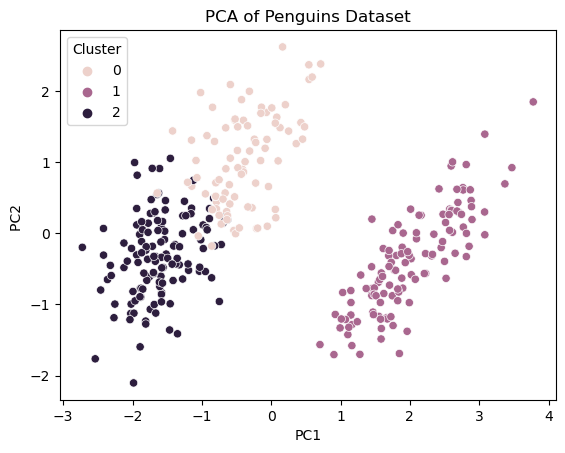

In [ ]:
#graph 
sns.scatterplot(df,x="PC1", y="PC2",hue="cluster")

plt.title("PCA of Penguins Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2 ")
plt.legend(title="Cluster")

In [13]:
cluster_summary = df.groupby("cluster")[features.columns].mean().round(2)
print(cluster_summary)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0                   47.66            18.75             196.92      3898.24
1                   47.54            15.00             217.23      5090.62
2                   38.31            18.10             188.55      3587.50
